In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 
import random
from citipy import citipy
from api_keys import (weather_api_key, gkey)

units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [2]:
# Generate Cities List
cities = []

# Generate random coordinates
lat = np.random.uniform(low = -90, high = 90, size=2000)
long = np.random.uniform(low = -180, high = 180, size=2000)
coordinates = list(zip(lat, long))

# For every set of coordinates:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


758


In [3]:
# Perform API calls

# for city in cities:
#     raw_data = requests.get(query_url + city).json()
    
# print(raw_data)


raw_data = requests.get(query_url + 'denver').json()

print(raw_data)

{'coord': {'lon': -104.9847, 'lat': 39.7392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.06, 'feels_like': 75.04, 'temp_min': 67.28, 'temp_max': 80.33, 'pressure': 1011, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 109, 'gust': 7}, 'clouds': {'all': 100}, 'dt': 1626299908, 'sys': {'type': 2, 'id': 2004334, 'country': 'US', 'sunrise': 1626263028, 'sunset': 1626316047}, 'timezone': -21600, 'id': 5419384, 'name': 'Denver', 'cod': 200}


In [5]:
# Perform API calls

# Set initial count
Set = 1
rec_num = 0

# Lists to hold data
place_name = []
country = []
lon = []
lat = []
weather = []
temp = []
temp_max = []
temp_min = []
humidity = []
cloudiness = []
wind_speed = []


# for city in the cities list
for city in cities:
    
    # try to get weather data
    try:
        raw_data = requests.get(query_url + city).json()
        
        place_name.append(raw_data['name'])
        country.append(raw_data['sys']['country'])
        lon.append(raw_data['coord']['lon'])
        lat.append(raw_data['coord']['lat'])
        weather.append(raw_data['weather'][0]['description'])
        temp.append(raw_data['main']['temp'])
        temp_max.append(raw_data['main']['temp_max'])
        temp_min.append(raw_data['main']['temp_min'])
        humidity.append(raw_data['main']['humidity'])
        cloudiness.append(raw_data['clouds']['all'])
        wind_speed.append(raw_data['wind']['speed'])
        
        
        # Add one to the record number
        rec_num += 1
        
        # If the number you get is more than 50
        if rec_num > 50:
            
            # Start over counting from 1
            rec_num = 1
            
            # add one to the set
            Set += 1
            
        print(f"Processing Record {rec_num} of Set {Set} | {raw_data['name']}")
        
    except:
        print('City not found. Skipping...')

Processing Record 1 of Set 1 | Tuatapere
Processing Record 2 of Set 1 | Fort Saint James
Processing Record 3 of Set 1 | Cockburn Town
Processing Record 4 of Set 1 | Tiksi
Processing Record 5 of Set 1 | Bijapur
Processing Record 6 of Set 1 | Madisonville
Processing Record 7 of Set 1 | Tuktoyaktuk
Processing Record 8 of Set 1 | Sinjār
Processing Record 9 of Set 1 | Luanda
Processing Record 10 of Set 1 | Hobart
Processing Record 11 of Set 1 | Busselton
Processing Record 12 of Set 1 | São João da Barra
Processing Record 13 of Set 1 | Aracati
City not found. Skipping...
Processing Record 14 of Set 1 | Clyde River
Processing Record 15 of Set 1 | Kushmurun
Processing Record 16 of Set 1 | Adrar
Processing Record 17 of Set 1 | Vestmannaeyjar
Processing Record 18 of Set 1 | Vakhrushev
Processing Record 19 of Set 1 | Saint-Philippe
Processing Record 20 of Set 1 | Kaitangata
Processing Record 21 of Set 1 | Westport
Processing Record 22 of Set 1 | Bredasdorp
Processing Record 23 of Set 1 | East Lon

In [51]:
# Create DataFrame

weather_data = {"City": place_name, 
              "Country": country, 
              "Longitude": lon, 
              "Latitude": lat, 
              "Weather": weather,
              "Temp": temp,
              "Temp (Max)": temp_max,
              "Temp (Min)": temp_min,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,167.6833,-46.1333,broken clouds,43.83,43.83,43.83,78,70,2.37
1,Fort Saint James,CA,-124.2500,54.4333,scattered clouds,80.60,80.60,80.60,23,28,8.81
2,Cockburn Town,TC,-71.1419,21.4612,few clouds,81.05,81.05,81.05,75,18,15.50
3,Tiksi,RU,128.8694,71.6872,overcast clouds,43.93,43.93,43.93,68,91,20.49
4,Bijapur,IN,75.7000,16.8333,overcast clouds,71.47,71.47,71.47,89,100,20.07
...,...,...,...,...,...,...,...,...,...,...,...
686,Kargasok,RU,80.8572,59.0556,broken clouds,60.60,60.60,60.60,95,54,12.01
687,Makkah al Mukarramah,SA,39.8261,21.4267,scattered clouds,88.66,88.66,88.66,26,43,5.95
688,Yar-Sale,RU,70.8333,66.8333,clear sky,43.79,43.79,43.79,65,6,5.82
689,Zhicheng,CN,111.5047,30.2956,light rain,80.60,80.60,80.60,82,62,3.29


In [52]:
# find cities with humidity over 100
weather_df[weather_df["Humidity"]>100]


,City,Country,Longitude,Latitude,Weather,Temp,Temp (Max),Temp (Min),Humidity,Cloudiness,Wind Speed


Text(0.5, 1.0, 'City Latitude vs. Temperature (F) (7/14/2021)')

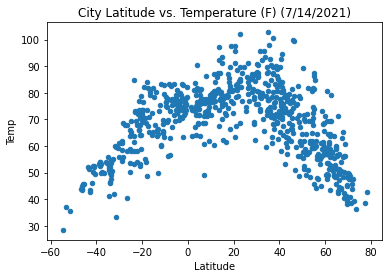

In [71]:
# Latitude vs. Temperature Plot
weather_df.plot.scatter("Latitude", "Temp")
plt.title('City Latitude vs. Temperature (F) (7/14/2021)')

Text(0.5, 1.0, 'City Latitude vs. Humidity (%) (7/14/2021)')

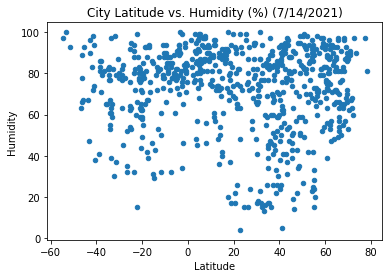

In [72]:
# Latitude vs. Humidity Plot
weather_df.plot.scatter("Latitude", "Humidity")
plt.title('City Latitude vs. Humidity (%) (7/14/2021)')

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (%) (7/14/2021)')

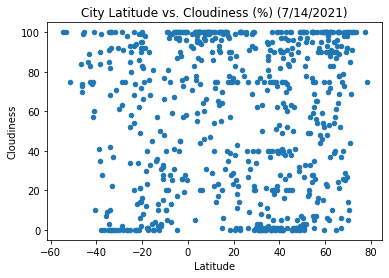

In [73]:
# Latitude vs. Cloudiness Plot
weather_df.plot.scatter("Latitude", "Cloudiness")
plt.title('City Latitude vs. Cloudiness (%) (7/14/2021)')

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (mph) (7/14/2021)')

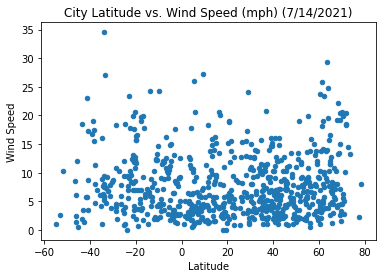

In [74]:
# Latitude vs. Wind Speed Plot
weather_df.plot.scatter("Latitude", "Wind Speed")
plt.title('City Latitude vs. Wind Speed (mph) (7/14/2021)')

Text(0.5, 1.0, 'Northern Hemisphere: City Latitude vs. Max Temperature (F) (7/14/2021)')

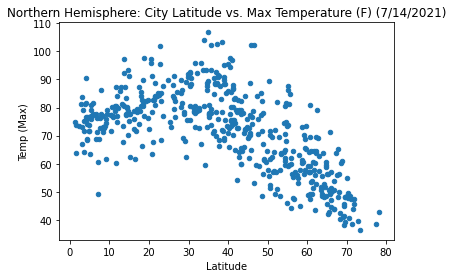

In [75]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
NH_df = weather_df[(weather_df['Latitude'] >= 0)]
NH_df.plot.scatter("Latitude", "Temp (Max)")
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (F) (7/14/2021)')

Text(0.5, 1.0, 'Southern Hemisphere: City Latitude vs. Max Temperature (F) (7/14/2021)')

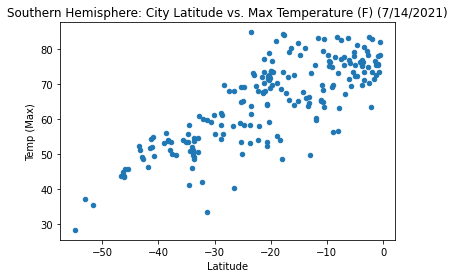

In [76]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
SH_df = weather_df[(weather_df['Latitude'] < 0)]
SH_df.plot.scatter("Latitude", "Temp (Max)")
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (F) (7/14/2021)')


Text(0.5, 1.0, 'Northern Hemisphere: City Latitude vs. Humidity (%) (7/14/2021)')

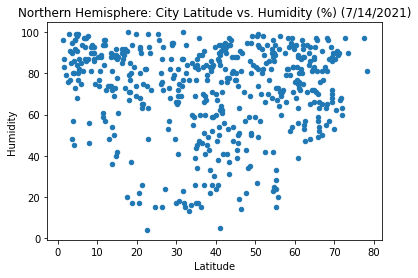

In [77]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Humidity")
plt.title('Northern Hemisphere: City Latitude vs. Humidity (%) (7/14/2021)')

Text(0.5, 1.0, 'Southern Hemisphere: City Latitude vs. Humidity (%) (7/14/2021)')

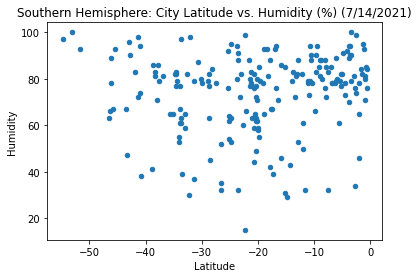

In [78]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Humidity")
plt.title('Southern Hemisphere: City Latitude vs. Humidity (%) (7/14/2021)')

Text(0.5, 1.0, 'Northern Hemisphere: City Latitude vs. Cloudiness (%) (7/14/2021)')

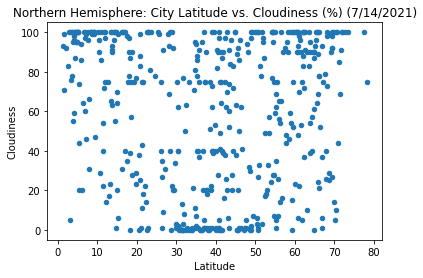

In [79]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Cloudiness")
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (%) (7/14/2021)')

Text(0.5, 1.0, 'Southern Hemisphere: City Latitude vs. Cloudiness (%) (7/14/2021)')

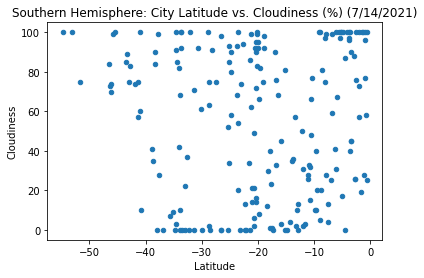

In [80]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Cloudiness")
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%) (7/14/2021)')

Text(0.5, 1.0, 'Northern Hemisphere: City Latitude vs. Wind Speed (mph) (7/14/2021)')

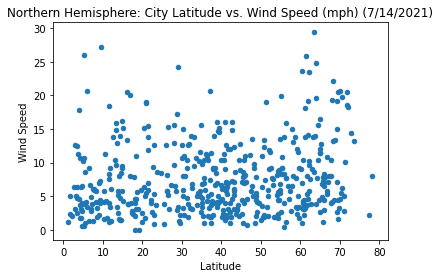

In [81]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
NH_df.plot.scatter("Latitude", "Wind Speed")
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (mph) (7/14/2021)')

Text(0.5, 1.0, 'Southern Hemisphere: City Latitude vs. Wind Speed (mph) (7/14/2021)')

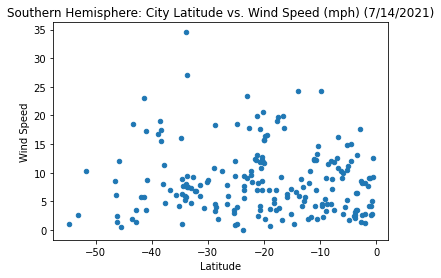

In [82]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
SH_df.plot.scatter("Latitude", "Wind Speed")
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (mph) (7/14/2021)')

In [65]:
weather_df.to_csv('../output_data/city_weather_data.csv')